<a href="https://colab.research.google.com/github/BiswajitPaul7/Yes-Bank-Data-Analysis/blob/main/Biswajit_Paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Prediction**
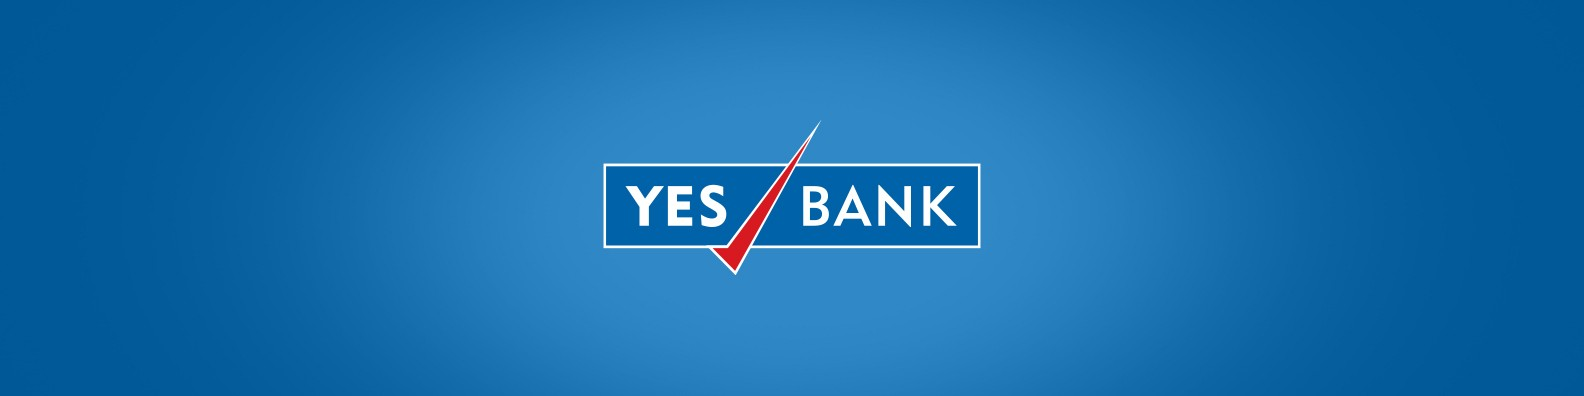
**Problem statement:** Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

Understanding the Problem Statement: Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. psychological, rational and irrational behavior, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy. Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.
Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.
Our focus will be on the technical analysis part. We’ll be using a dataset.

What is stock?

A Stock or share (also known as a company’s “equity”) is a financial instrument that represents ownership in a company.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices of the bank since its inception. It contains the following features:

Date: It denotes date of investment done (in our case we have month and year).

Date: It denotes date of investment done (in our case we have month and year).

Open: Open means the price at which a stock started trading when the opening bell rang.

High: High refer to the maximum prices in a given time period.

Low: Low refer to the minimum prices in a given time period.

Close: Close refers to the price of an individual stock when the stock exchange closed for the day.

In [39]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import NearestNeighbors

#Model Evaluation 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df= pd.read_csv('/content/drive/MyDrive/Capstone_Project_2/data_YesBank_StockPrices.csv') 

In [42]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [43]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [44]:
df.shape

(185, 5)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [46]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### **Data Cleaning**

In [47]:
#check null values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [48]:
len(df[df.duplicated()])

0

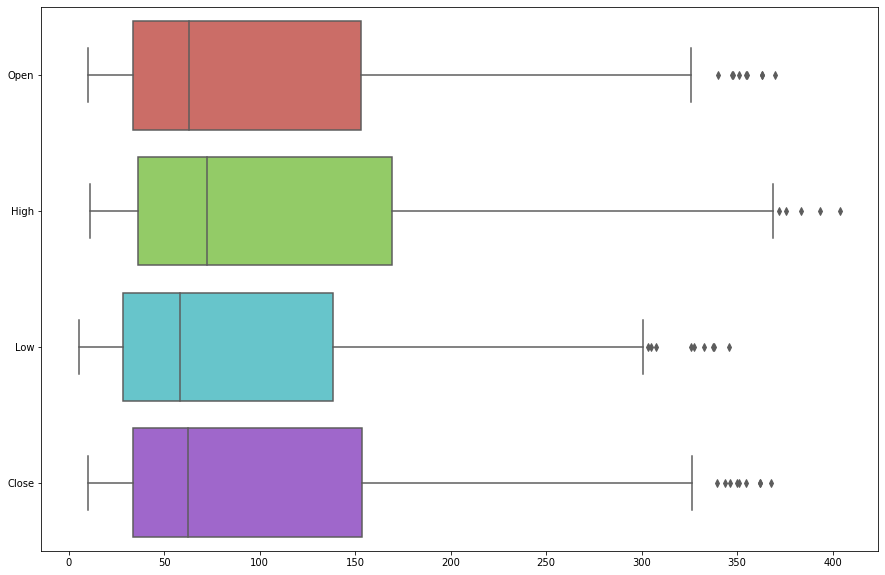

In [49]:
#checking outliers 
plt.figure(figsize= (15, 10))
sns.boxplot(data=df, orient="h", palette="hls")

# **Exploratory Data Analysis**

**Univariate Analysis**

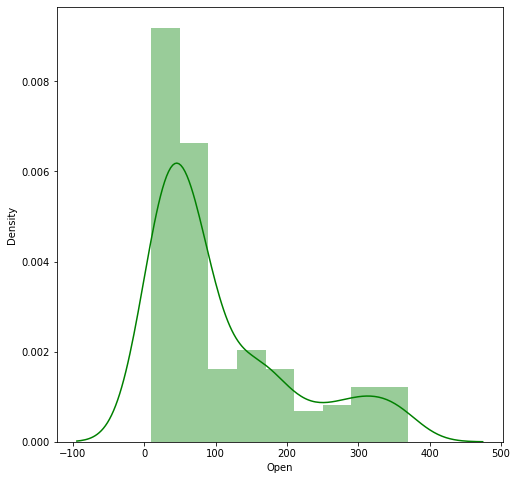

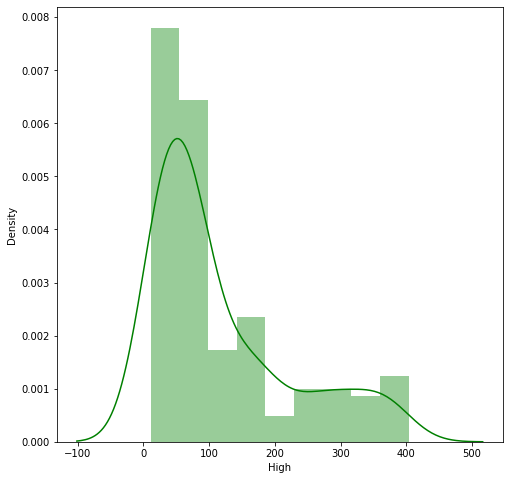

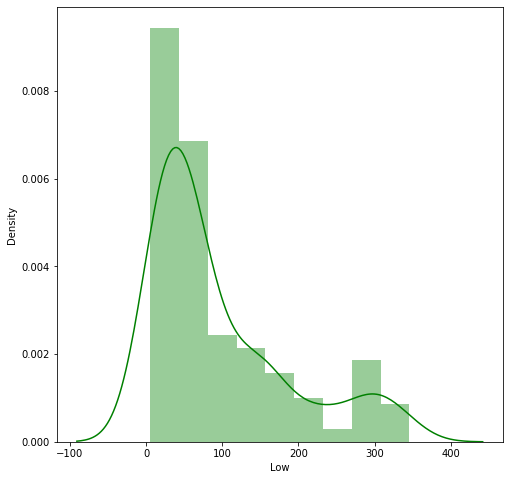

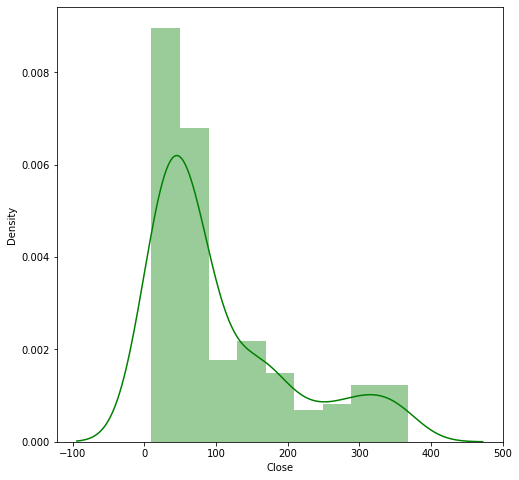

In [50]:
plt.figure(figsize=(8,8))
sns.distplot(df['Open'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['High'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['Low'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['Close'], color='g')

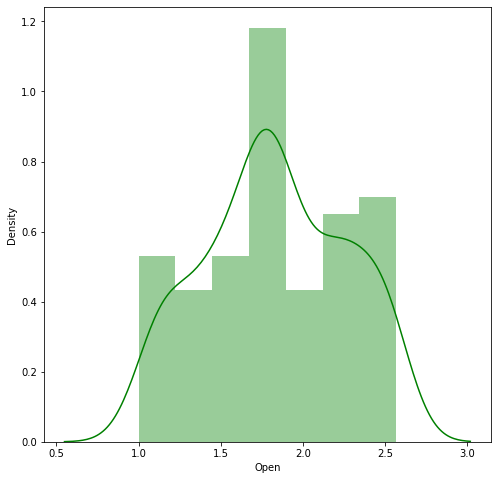

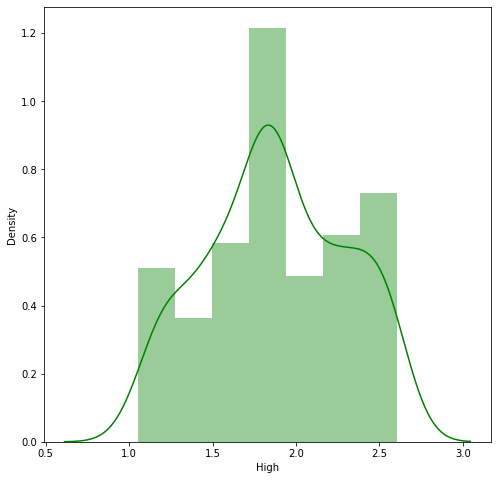

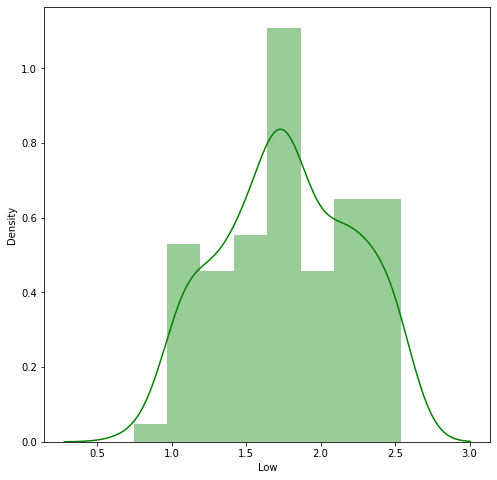

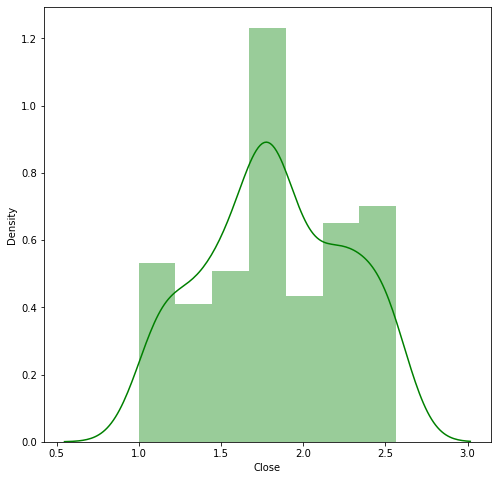

In [51]:
# Normal Distribution 
plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['Open']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['High']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['Low']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['Close']), color='g')

**Multivariate Analysis**

In [52]:
#Convertting Date column from object to date type(Data wrangling)
df['Date']= pd.to_datetime(df['Date'], format= '%b-%y')

In [53]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [54]:
Yearly_df= df.groupby('Date')['Close'].mean().reset_index()
Yearly_df.head()

,Date,Close
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41


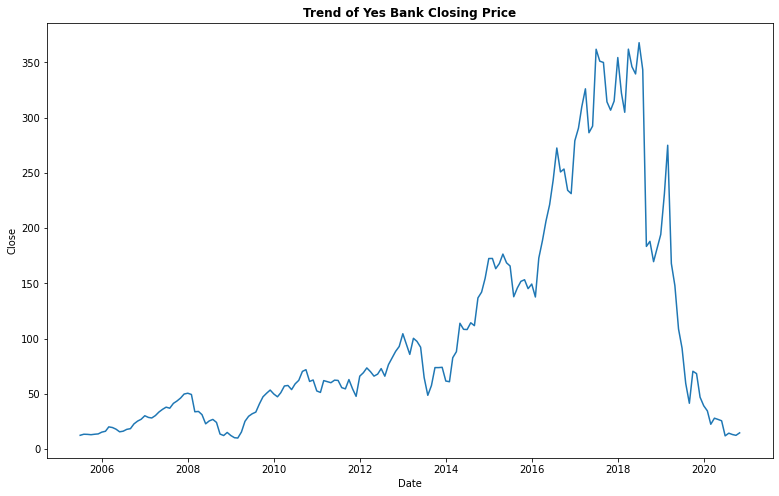

In [55]:
plt.figure(figsize= [13, 8])
plt.title("Trend of Yes Bank Closing Price", fontweight = 'bold')
sns.lineplot(data=Yearly_df, x= 'Date', y= 'Close', palette= 'husl' )

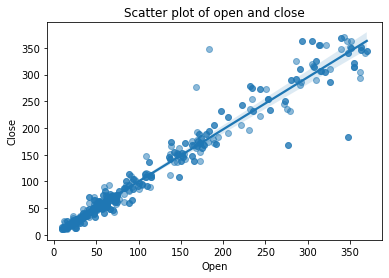

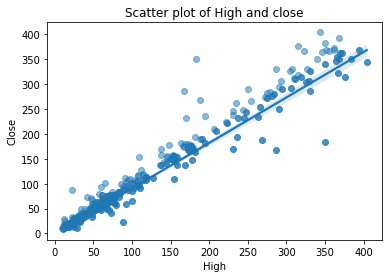

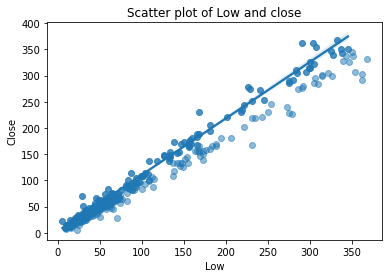

In [56]:
# To find relational between dependent variable and independent variable

plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter plot of open and close')
plt.xlabel('Open')
plt.ylabel('Close')
sns.regplot(x="Open", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter plot of High and close')
plt.xlabel('High')
plt.ylabel('Close')
sns.regplot(x="High", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter plot of Low and close')
plt.xlabel('Low')
plt.ylabel('Close')
sns.regplot(x="Low", y="Close", data=df)
plt.show()

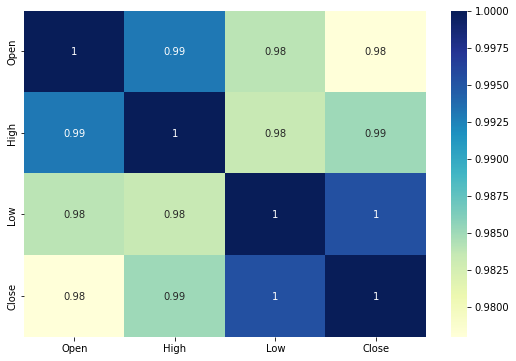

In [57]:
#Let's get the heatmmap of the Numerical Variables
plt.figure(figsize= (9, 6))
Coorelation_matrix= df.corr()
sns.heatmap(Coorelation_matrix, annot= True, cmap= 'YlGnBu')

**Feature Engineering**

In [58]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [59]:
# Let's create a month and year column from the Date column
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year

In [60]:
df.head()

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


In [61]:
df.index= df['Date']
df.drop('Date', axis= 1, inplace= True)

In [62]:
df.head()

,Open,High,Low,Close,Month,Year
Date,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,7,2005
2005-08-01,12.58,14.88,12.55,13.42,8,2005
2005-09-01,13.48,14.87,12.27,13.30,9,2005
2005-10-01,13.20,14.47,12.40,12.99,10,2005
2005-11-01,13.35,13.88,12.88,13.41,11,2005


**Feature Selection**

In [63]:
#Removing Multicollinearity between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  vif = pd.DataFrame()
  vif['Variables']= X.columns
  vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return (vif)

In [64]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Close', 'Month', 'Year']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [65]:
df.drop('Open',axis=1,inplace=True)

In [66]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Close', 'Month', 'Year']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


In [67]:
df.drop('High',axis=1,inplace=True)

In [68]:
df.head()

,Low,Close,Month,Year
Date,,,,
2005-07-01,11.25,12.46,7,2005
2005-08-01,12.55,13.42,8,2005
2005-09-01,12.27,13.30,9,2005
2005-10-01,12.40,12.99,10,2005
2005-11-01,12.88,13.41,11,2005


**One Hot Encoding**

In [69]:
new_df=pd.get_dummies(df,columns=['Year'])

In [70]:
new_df.head()

,Low,Close,Month,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,,,
2005-07-01,11.25,12.46,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-08-01,12.55,13.42,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-09-01,12.27,13.30,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-10-01,12.40,12.99,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-11-01,12.88,13.41,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Summmarizing the data**

In [71]:
independent_features= [col for col in new_df if col not in ['Close', 'Month']]
len(independent_features)

17

In [72]:
#applying zscore to selected independent variables 
X = round(new_df[independent_features].apply(zscore),3)

#applying log on dependent variable
y = np.log10(new_df['Close'])

In [73]:
X.head()

,Low,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,
2005-07-01,-0.920,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-08-01,-0.906,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-09-01,-0.909,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-10-01,-0.907,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-11-01,-0.902,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251


In [74]:
y.head()

Date
2005-07-01    1.095518
2005-08-01    1.127753
2005-09-01    1.123852
2005-10-01    1.113609
2005-11-01    1.127429
Name: Close, dtype: float64

**Train Test Split**